## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [4]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [5]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [7]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [8]:
dist_df = pd.DataFrame(dist_compare)

In [9]:
dist_df.head()

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,10,11.980543,9.035404,4.079687,4.997015
1,11,11.980543,8.611634,3.925553,5.492062
2,12,11.980543,8.502998,3.771784,4.842447
3,13,11.980543,8.035054,3.627613,4.876027
4,14,11.980543,7.951104,3.485437,4.552515


In [17]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

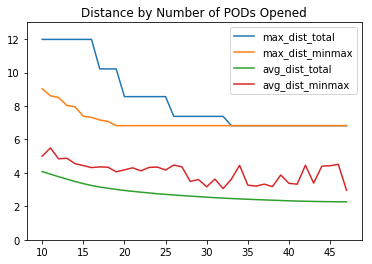

In [19]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
plt.legend(cols)
plt.ylim(0, 13)
plt.show()

In [33]:
cols = ['max_dist_total','avg_dist_total']

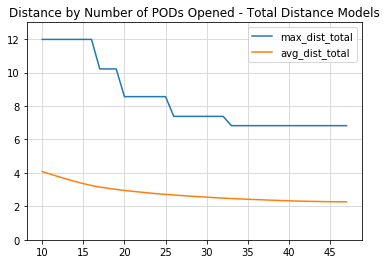

In [35]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Total Distance Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

In [36]:
cols = ['max_dist_minmax','avg_dist_minmax']

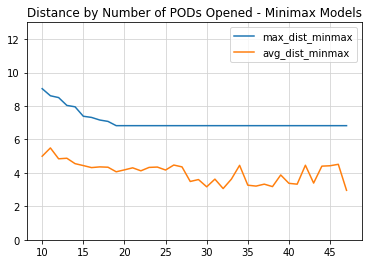

In [37]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Minimax Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

### Histograms

In [ ]:
# would be interesting to do a histogram of the number of times each POD is selected in the solutions

### Population

In [86]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300


In [147]:
# set number of pods to open (10-47)
num_pods_open = 20


# get id of pods in solution
pods = []
for i in pods_total[num_pods_open]:
    pods.append(i[1])

pod_ids = set(pods) # could use to match up to  list of names, locations of selected pods


pods = pd.DataFrame(pods_total[num_pods_open])
pods.columns = ["bg","pod"]

#Merge population and pod data frames
pods = pd.merge(population,
                pods,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

pods.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,1.0,3.0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,2.0,3.0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,3.0,3.0
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,4.0,3.0
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,5.0,3.0


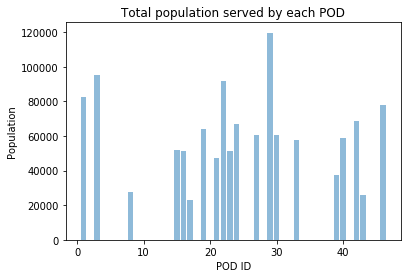

In [146]:
pods = pods.groupby("pod").population.sum().reset_index()

plt.bar(pods['pod'], pods['population'],align='center', alpha=0.5)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.title('Total population served by each POD')

plt.show()

### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())